<a href="https://colab.research.google.com/github/kriskamal/Fertilizing-Lawn-Project---Linear-Programming-/blob/main/BDM_3_1_Fertilizing_the_Lawn_(Minimization_using_Pyomo_based_Linear_Programming).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fertilizing the Lawn (Minimization using Linear Programming)

* Kamal Kannan Krishnan
* Oct 16, 2020

--------------------------------------------------------------------------


**[Powell 9.2 - Fertilizing the Lawn]** The facilities manager at Oxbridge University is planning to apply fertilizer to the grass in the quadrangle area in the spring. The grass needs nitrogen, phosphorus, and potash in at least the amounts given in the following table:

Mineral Minimum| Weight(lb)
---|---
Nitrogen| 12
Phosphorus| 14 
Potash | 18

Three kinds of commercial fertilizer are available, with mineral content and prices per 1,000 pounds as given in the followingtable.There is virtually unlimited supply of each kind of fertilizer.


Fertilizer | Nitrogen Content (lb)| Phosphorus Content (lb)| Potash  Content (lb)| Price($)
---|---|---|---|---
A |20| 10| 5| 10
B |10| 5| 15| 8 
C |15| 10| 5| 7


1. How much of each fertilizer should be purchased to satisfy the requirements at minimum cost?

2. What are the LHS values for the Nitrogren, Phosphorous and Potash constraints? What are the RHS values? Extract these using the Sensitivity Analysis report (requires you write to Google Drive).

3. What are the LHS values for the Nitrogren, Phosphorous and Potash constraints? What are the RHS values? Extract these using Pyomo (does not require writing to Google Drive).

4. Are any of the constraints 'binding'? Describe which constraints are binding (if any). Why binding constraints might be the key to saving even more money.

#Question 1
How much of each fertilizer should be purchased to satisfy the requirements at minimum cost?

**Define the Objective Function**

$Cost = 10A + 8B + 7C$

**Write the Constraints**

$Min(Z) = 10A + 8B + 7C$

subject to:
* $(20/1000)A + (10/1000)B + (15/1000)C >= 12$ `Nitrogen`
* $(10/1000)A + (5/1000)B + (10/1000)C >= 14$ `Phosphorus`
* $(5/1000)A + (15/1000)B + (5/1000)C >= 18$ `Potash`
* A, B, C >= 0 `non negative`


In [ ]:
# import modules

%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *

In [ ]:
# declare the model
model = ConcreteModel()

# declare decision variables
model.a = Var(domain=NonNegativeReals) # a for Fertilizer A
model.b = Var(domain=NonNegativeReals) # b for Fertilizer B
model.c = Var(domain=NonNegativeReals) # c for Fertilizer C

# declare objective
# Important to have Sense as Minimize, as the problem is minimisation.
model.cost = Objective(
                      expr = (10)*model.a + (8)*model.b + (7)*model.c, # values come from the table
                      sense = minimize)

# declare constraints
model.C1_Nitrogen = Constraint(expr = (20/1000)*model.a + (10/1000)*model.b + (15/1000)*model.c >= 12) # Nitrogen
model.C2_Phosphorus = Constraint(expr = (10/1000)*model.a + (5/1000)*model.b + (10/1000)*model.c >= 14) # Phosphorous
model.C3_Potash = Constraint(expr = (5/1000)*model.a + (15/1000)*model.b + (5/1000)*model.c >= 18) # Potash

In [ ]:
# show the model you've created
model.pprint()

3 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    c : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 10*a + 8*b + 7*c

3 Constraint Declarations
    C1_Nitrogen : Size=1, Index=None, Active=True
        Key  : Lower : Body                      : Upper : Active
        None :  12.0 : 0.02*a + 0.01*b + 0.015*c :  +Inf :   True
    C2_Phosphorus : Size=1, Index=None, Active=True
        Key  : Lower : Body                      : Upper : Active
    

In [ ]:
# solve it
SolverFactory('cbc', executable='/usr/bin/cbc').solve(model).write()


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 13760.0
  Upper bound: 13760.0
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 4
  Number of nonzeros: 3
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.01
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of create

## Answer for Q1:

In [ ]:
# show the results
print("Cost = ", model.cost(), ' USD')
print("A = ", model.a(), ' pounds') 
print("B = ", model.b(), ' pounds') 
print("C = ", model.c(), ' pounds') 

Cost =  13760.0  USD
A =  0.0  pounds
B =  880.0  pounds
C =  960.0  pounds


In [ ]:
# Check Binding Constraint

print("Nitrogen   = ", model.C1_Nitrogen(), ' pounds') 
print("Phosphorus = ", model.C2_Phosphorus(), ' pounds') 
print("Potash     = ", model.C3_Potash(), ' pounds') 

Nitrogen   =  23.2  pounds
Phosphorus =  14.0  pounds
Potash     =  18.0  pounds



---

# Question 2:
What are the LHS values for the Nitrogren, Phosphorous and Potash constraints? What are the RHS values? Extract these using the Sensitivity Analysis report (requires you write to Google Drive).

In [ ]:
# before you do anything...
# mount your drive!
# click folder on the left...
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("glpsol") or os.path.isfile("glpsol")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq glpk-utils
    else:
        try:
            !conda install -c conda-forge ipopt
        except:
            pass

assert(shutil.which("glpsol") or os.path.isfile("glpsol"))

from pyomo.environ import *
SOLVER = 'glpk'
EXECUTABLE = '/usr/bin/glpsol'

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 144656 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-1_amd64.deb ...
Unpacking glpk-utils (4.65-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Setting up libcolamd2:amd64 (1:5.1.2-2) ...
Setting up libamd2:amd64 

In [ ]:
# declare the model
model = ConcreteModel()

# declare decision variables
model.a = Var(domain=NonNegativeReals) # a for Fertilizer A
model.b = Var(domain=NonNegativeReals) # b for Fertilizer B
model.c = Var(domain=NonNegativeReals) # c for Fertilizer C

# declare objective
# Important to have Sense as Minimize, as the problem is minimisation.
model.cost = Objective(
                      expr = (10)*model.a + (8)*model.b + (7)*model.c, # values come from the table
                      sense = minimize)

model.Nitrogen = Constraint(expr = (20/1000)*model.a + (10/1000)*model.b + (15/1000)*model.c >= 12) # Nitrogen
model.Phosphorus = Constraint(expr = (10/1000)*model.a + (5/1000)*model.b + (10/1000)*model.c >= 14) # Phosphorous
model.Potash = Constraint(expr = (5/1000)*model.a + (15/1000)*model.b + (5/1000)*model.c >= 18) # Potash

In [ ]:
# solve the problem 
SolverFactory(SOLVER,executable=EXECUTABLE).solve(model).write()


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 13760.0
  Upper bound: 13760.0
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 4
  Number of nonzeros: 10
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.015191078186035156
# ----------------------------------------------------------
#   Solution Information
# -------------------------------

In [ ]:
# First, we will save the model (you will see the file model.lp showing up on the left after executing the line below)
model.write("/content/model.lp", io_options={'symbolic_solver_labels': True})

# After running the line below, we will generate the file "sensit.sen", which contains the report we want to see
!/usr/bin/glpsol -m /content/model.lp --lp --ranges sensit.sen

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m /content/model.lp --lp --ranges sensit.sen
Reading problem data from '/content/model.lp'...
4 rows, 4 columns, 10 non-zeros
36 lines were read
GLPK Simplex Optimizer, v4.65
4 rows, 4 columns, 10 non-zeros
Preprocessing...
3 rows, 3 columns, 9 non-zeros
Scaling...
 A: min|aij| =  5.000e-03  max|aij| =  2.000e-02  ratio =  4.000e+00
GM: min|aij| =  6.389e-01  max|aij| =  1.565e+00  ratio =  2.449e+00
EQ: min|aij| =  4.082e-01  max|aij| =  1.000e+00  ratio =  2.449e+00
Constructing initial basis...
Size of triangular part is 3
      0: obj =   0.000000000e+00 inf =   3.135e+03 (3)
      3: obj =   1.664000000e+04 inf =   0.000e+00 (0)
*     4: obj =   1.376000000e+04 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (40424 bytes)
Write sensitivity analysis report to 'sensit.sen'...


In [ ]:
# After generating the report, we want to see its content:
!cat /content/sensit.sen

GLPK 4.65 - SENSITIVITY ANALYSIS REPORT                                                                         Page   1

Problem:    
Objective:  cost = 13760 (MINimum)

   No. Row name     St      Activity         Slack   Lower bound       Activity      Obj coef  Obj value at Limiting
                                          Marginal   Upper bound          range         range   break point variable
------ ------------ -- ------------- ------------- -------------  ------------- ------------- ------------- ------------
     1 c_l_Nitrogen_
                    BS      23.20000     -11.20000      12.00000       54.00000    -371.42857    5142.85714 c_l_Phosphorus_
                                            .               +Inf       23.20000          +Inf          +Inf

     2 c_l_Phosphorus_
                    NL      14.00000        .           14.00000        6.00000    -520.00000    9600.00000 c
                                         520.00000          +Inf       36.00000        

## Answer for Q2:
From the "Activity" column in first part of sensitivity report above, we can get the following LHS Values for the Various Constraints:

* Nitrogen is   = 23.2 pounds

* Phosphorus is = 14.0 pounds

* Potash is     = 18.0 pounds

From the "Lower and Upper Bound" column in first part of sensitivity report above, we can get the following RHS Values for the Various Constraints:

* Nitrogen is   = 12.0 to Inf. pounds

* Phosphorus is = 14.0 to Inf. pounds

* Potash is     = 18.0 to Inf. pounds





---

# Question 3:
What are the LHS values for the Nitrogren, Phosphorous and Potash constraints? What are the RHS values? Extract these using Pyomo (does not require writing to Google Drive).




In [ ]:
# import modules

%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *

In [ ]:
# declare the model
model = ConcreteModel()

# declare decision variables
model.a = Var(domain=NonNegativeReals) # a for Fertilizer A
model.b = Var(domain=NonNegativeReals) # b for Fertilizer B
model.c = Var(domain=NonNegativeReals) # c for Fertilizer C

# declare objective
# Important to have Sense as Minimize, as the problem is minimisation.
model.cost = Objective(
                      expr = (10)*model.a + (8)*model.b + (7)*model.c, # values come from the table
                      sense = minimize)

# declare constraints
#model.C1_Nitrogen = Constraint(expr = 20*model.a + 10*model.b + 15*model.c >= 12) # Nitrogen
#model.C2_Phosphorus = Constraint(expr = 10*model.a + 5*model.b + 10*model.c >= 14) # Phosphorous
#model.C3_Potash = Constraint(expr = 5*model.a + 15*model.b + 5*model.c >= 18) # Potash

model.C1_Nitrogen = Constraint(expr = (20/1000)*model.a + (10/1000)*model.b + (15/1000)*model.c >= 12) # Nitrogen
model.C2_Phosphorus = Constraint(expr = (10/1000)*model.a + (5/1000)*model.b + (10/1000)*model.c >= 14) # Phosphorous
model.C3_Potash = Constraint(expr = (5/1000)*model.a + (15/1000)*model.b + (5/1000)*model.c >= 18) # Potash

In [ ]:
# solve it
SolverFactory('cbc', executable='/usr/bin/cbc').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 13760.0
  Upper bound: 13760.0
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 4
  Number of nonzeros: 3
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.01
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of create

## Answer for Q3:

In [ ]:
# Print the results

print("Cost = ", model.cost(), ' USD')
print("\n")
print("Variables:")
print("A = ", model.a(), ' pounds') 
print("B = ", model.b(), ' pounds') 
print("C = ", model.c(), ' pounds') 
print("\n")
print("Constraints (LHS values):")
print("Nitrogen   = ", model.C1_Nitrogen(), ' pounds') 
print("Phosphorus = ", model.C2_Phosphorus(), ' pounds') 
print("Potash     = ", model.C3_Potash(), ' pounds') 
print("\n")
print("Constraints (RHS values):")
print("Nitrogen   = 12 pounds") 
print("Phosphorus = 14 pounds") 
print("Potash     = 18 pounds") 

Cost =  13760.0  USD


Variables:
A =  0.0  pounds
B =  880.0  pounds
C =  960.0  pounds


Constraints (LHS values):
Nitrogen   =  23.2  pounds
Phosphorus =  14.0  pounds
Potash     =  18.0  pounds


Constraints (RHS values):
Nitrogen   = 12 pounds
Phosphorus = 14 pounds
Potash     = 18 pounds




---


# Question 4:

Are any of the constraints 'binding'? Describe which constraints are binding (if any)? Why binding constraints might be the key to saving even more money.

## Answer to Q4:

Yes, there are following 2 Binding Constraints 

* Phosphorus = 14 pounds. It can be seen from Sensitivity report that Slack = 0 (i.e LHS == RHS) for this constraint.

* Potash = 18 pounds.  It can be seen from Sensitivity report that Slack = 0 (i.e LHS == RHS) for this constraint.

If we increase minimum requirement of Phosphorus by 1 pound, then the cost increase will be 520 USD. Similarly, if we increase the minimum requirement of Potash by 1 pound, then the cost increase will be 360 USD. These will increase the money needed to fertilize the area.

The above observation can be seen when we calculate by using For loop and varying the Phosphorus and Potash Requirements. See the code below:








---

## For Loop for 'Shadow Prices':



In [ ]:
myPhosphorus = np.arange(1,51,2)
print(myPhosphorus)


[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49]


In [ ]:
# store the results
import pandas as pd
myResults = pd.DataFrame() # empty place to store results

for x in myPhosphorus:
  # declare the model
  model = ConcreteModel()

  # declare decision variables
  model.a = Var(domain=NonNegativeReals) # a for Fertilizer A
  model.b = Var(domain=NonNegativeReals) # b for Fertilizer B
  model.c = Var(domain=NonNegativeReals) # c for Fertilizer C

  # declare objective
  # Important to have Sense as Minimize, as the problem is minimisation.
  model.cost = Objective(
                        expr = (10)*model.a + (8)*model.b + (7)*model.c, # values come from the table
                        sense = minimize)

  # declare constraints
  #model.C1_Nitrogen = Constraint(expr = 20*model.a + 10*model.b + 15*model.c >= 12) # Nitrogen
  #model.C2_Phosphorus = Constraint(expr = 10*model.a + 5*model.b + 10*model.c >= 14) # Phosphorous
  #model.C3_Potash = Constraint(expr = 5*model.a + 15*model.b + 5*model.c >= 18) # Potash

  model.C1_Nitrogen = Constraint(expr = (20/1000)*model.a + (10/1000)*model.b + (15/1000)*model.c >= 12) # Nitrogen
  model.C2_Phosphorus = Constraint(expr = (10/1000)*model.a + (5/1000)*model.b + (10/1000)*model.c >= x) # Phosphorous
  model.C3_Potash = Constraint(expr = (5/1000)*model.a + (15/1000)*model.b + (5/1000)*model.c >= 18) # Potash

  # solve it
  SolverFactory('cbc', executable='/usr/bin/cbc').solve(model).write()

  # results
  myX = pd.DataFrame([12,x,18,model.cost(),model.a(),model.b(),model.c()])
  myX = myX.T #transpose

  #Store the column_stack
  myResults = myResults.append(myX)

# Change the Column names
myResults = myResults.rename( {0:"Nitrogen", 1:"Phosphorus",2:"Potash", 3:"Cost" ,4:"A", 5:"B", 6:"C"}, axis='columns') 
myResults.reset_index(drop=True, inplace=True)

print(myResults)

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 9600.0
  Upper bound: 9600.0
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 4
  Number of nonzeros: 3
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created s

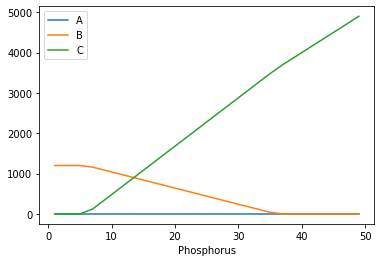

In [ ]:
# make a nice plot
tmp = myResults.drop(['Nitrogen','Potash','Cost'], axis=1)
tmp.plot(x='Phosphorus')
plt.show()

In [ ]:
# add a column for marginal increase per pound
myResults['CostDiff'] = myResults['Cost'].diff()/myResults['Phosphorus'].diff()

myResults

,Nitrogen,Phosphorus,Potash,Cost,A,B,C,CostDiff
0,12.0,1.0,18.0,9600.0,0.0,1200.0,0.0,NaN
1,12.0,3.0,18.0,9600.0,0.0,1200.0,0.0,0.0
2,12.0,5.0,18.0,9600.0,0.0,1200.0,0.0,0.0
3,12.0,7.0,18.0,10120.0,0.0,1160.0,120.0,260.0
4,12.0,9.0,18.0,11160.0,0.0,1080.0,360.0,520.0
5,12.0,11.0,18.0,12200.0,0.0,1000.0,600.0,520.0
6,12.0,13.0,18.0,13240.0,0.0,920.0,840.0,520.0
7,12.0,15.0,18.0,14280.0,0.0,840.0,1080.0,520.0
8,12.0,17.0,18.0,15320.0,0.0,760.0,1320.0,520.0
9,12.0,19.0,18.0,16360.0,0.0,680.0,1560.0,520.0


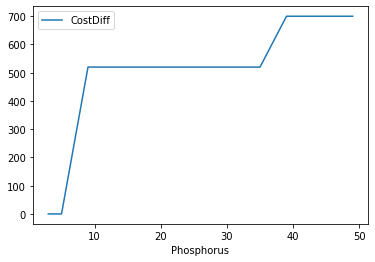

In [ ]:
# make a nice plot
tmp = myResults.drop(['Nitrogen','Potash','Cost','A','B','C'], axis=1)
tmp.plot(x='Phosphorus')
plt.show()

In [ ]:
myPotash = np.arange(1,51,2)
print(myPotash)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49]


In [ ]:
# store the results
import pandas as pd
myResults = pd.DataFrame() # empty place to store results

for x in myPotash:
  # declare the model
  model = ConcreteModel()

  # declare decision variables
  model.a = Var(domain=NonNegativeReals) # a for Fertilizer A
  model.b = Var(domain=NonNegativeReals) # b for Fertilizer B
  model.c = Var(domain=NonNegativeReals) # c for Fertilizer C

  # declare objective
  # Important to have Sense as Minimize, as the problem is minimisation.
  model.cost = Objective(
                        expr = (10)*model.a + (8)*model.b + (7)*model.c, # values come from the table
                        sense = minimize)

  # declare constraints
  #model.C1_Nitrogen = Constraint(expr = 20*model.a + 10*model.b + 15*model.c >= 12) # Nitrogen
  #model.C2_Phosphorus = Constraint(expr = 10*model.a + 5*model.b + 10*model.c >= 14) # Phosphorous
  #model.C3_Potash = Constraint(expr = 5*model.a + 15*model.b + 5*model.c >= 18) # Potash

  model.C1_Nitrogen = Constraint(expr = (20/1000)*model.a + (10/1000)*model.b + (15/1000)*model.c >= 12) # Nitrogen
  model.C2_Phosphorus = Constraint(expr = (10/1000)*model.a + (5/1000)*model.b + (10/1000)*model.c >= 14) # Phosphorous
  model.C3_Potash = Constraint(expr = (5/1000)*model.a + (15/1000)*model.b + (5/1000)*model.c >= x) # Potash

  # solve it
  SolverFactory('cbc', executable='/usr/bin/cbc').solve(model).write()

  # results
  myX = pd.DataFrame([12,14,x,model.cost(),model.a(),model.b(),model.c()])
  myX = myX.T #transpose

  #Store the column_stack
  myResults = myResults.append(myX)

# Change the Column names
myResults = myResults.rename( {0:"Nitrogen", 1:"Phosphorus",2:"Potash", 3:"Cost" ,4:"A", 5:"B", 6:"C"}, axis='columns') 
myResults.reset_index(drop=True, inplace=True)

print(myResults)

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 9800.0
  Upper bound: 9800.0
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 4
  Number of nonzeros: 3
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created s

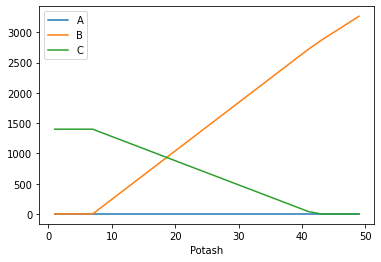

In [ ]:
# make a nice plot
tmp = myResults.drop(['Nitrogen','Phosphorus','Cost'], axis=1)
tmp.plot(x='Potash')
plt.show()

In [ ]:
# add a column for marginal increase per pound
myResults['CostDiff'] = myResults['Cost'].diff()/myResults['Potash'].diff()

myResults

,Nitrogen,Phosphorus,Potash,Cost,A,B,C,CostDiff
0,12.0,14.0,1.0,9800.0000,0.0,0.0000,1400.0,NaN
1,12.0,14.0,3.0,9800.0000,0.0,0.0000,1400.0,0.0000
2,12.0,14.0,5.0,9800.0000,0.0,0.0000,1400.0,0.0000
3,12.0,14.0,7.0,9800.0000,0.0,0.0000,1400.0,0.0000
4,12.0,14.0,9.0,10520.0000,0.0,160.0000,1320.0,360.0000
5,12.0,14.0,11.0,11240.0000,0.0,320.0000,1240.0,360.0000
6,12.0,14.0,13.0,11960.0000,0.0,480.0000,1160.0,360.0000
7,12.0,14.0,15.0,12680.0000,0.0,640.0000,1080.0,360.0000
8,12.0,14.0,17.0,13400.0000,0.0,800.0000,1000.0,360.0000
9,12.0,14.0,19.0,14120.0000,0.0,960.0000,920.0,360.0000


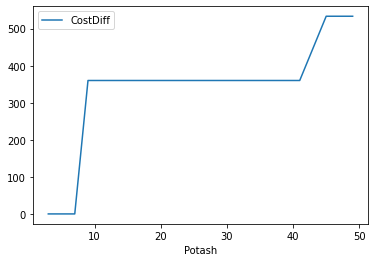

In [ ]:
# make a nice plot
tmp = myResults.drop(['Nitrogen','Phosphorus','Cost','A','B','C'], axis=1)
tmp.plot(x='Potash')
plt.show()